In [1]:
#Hi gang! I make vines. Lol lets go.

import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from random import randint
import random

In [2]:
def vine(top, bot, amp, width, omega, res, size, data, inval, rand):
    
    '''vine takes in a ton of floats and outputs a list of verticies that define the vine as a polygon.
    top is a float for the max height of the center vine (mm) (some leaves may be taller!)
    bot is a float for the minimum of the vine, no leaves will be lower (mm)
    amp is the amplitude of the sine wave that definse the vine (mm)
    width is how thick the vine is (mm)
    omega is how fast the vine oscilates (rad/mm)
    res is the size of vertical steps (mm)
    size is the size of leaves
    data is a list of 1, 2, and 3's that define the pattern of leaves (1 is left leaf, 2 is right leaf, 3 is both)
    inval is the the number of steps (whose size is defined by res) between leaves
    rand is the coeficent of randomness added to the leaf co-ordinates, if it is 1 they can change by plus or minus 0.5mm
    '''
    
    #Paramaters
    interval = inval*res
    
    random.seed(271) #make deterministic
    
    #Leaf param
    side1 = 0.25*np.array([1,0])*size
    side2 = 0.125*np.array([3,1])*size
    side3 = 0.5*np.array([1,2])*size
    side4 = 0.25*np.array([-2,-1])*size
    side5 = 0.125*np.array([-1,-3])*size

    #generate vine spine
    spine = []
    for i in np.linspace(bot,top,int(1 + (top-bot)/res)):
        spine.append([amp/2*np.sin(i * omega), i])

    verts = []

    #Work up the right side, adding leaves as needed
    counter = 0
    for i in spine:
        x = i[0]
        y = i[1]
        if len(data) <= counter:
            counter = 0
        if (i[1]%interval) == 0: 
            if (data[counter] == 3 or data[counter] == 2):
                #Leaf time lets go
                noise =  list([(random.random()-0.5)*rand, + (random.random()-0.5)*rand])
                noise = np.array(noise)
                current = [x+width/2, y] + noise
                verts.append(current)
                noise =  list([(random.random()-0.5)*rand, + (random.random()-0.5)*rand])
                noise = np.array(noise)
                current = current + side1 + noise
                verts.append(current)
                noise =  list([(random.random()-0.5)*rand, + (random.random()-0.5)*rand])
                noise = np.array(noise)
                current = current + side2 + noise
                verts.append(current)
                noise =  list([(random.random()-0.5)*rand, + (random.random()-0.5)*rand])
                noise = np.array(noise)
                current = current + side3 + noise
                verts.append(current)
                noise =  list([(random.random()-0.5)*rand, + (random.random()-0.5)*rand])
                noise = np.array(noise)
                current = current + side4 + noise
                verts.append(current)
                noise =  list([(random.random()-0.5)*rand, + (random.random()-0.5)*rand])
                noise = np.array(noise)
                current = current + side5 + noise
                verts.append(current)
                verts.append( [x+width/2,y])
            counter += 1
        else:
            verts.append( [x+width/2,y])

    #down
    counter = len(data) - counter
    data = list(reversed(data))
    for i in reversed(spine):
        x = i[0]
        y = i[1]
        if len(data) <= counter:
            counter = 0
        if (i[1]%interval)< 0.5*res:
            if (data[counter] == 3 or data[counter] == 1):
                #LEAF TIME
                noise =  list([(random.random()-0.5)*rand, + (random.random()-0.5)*rand])
                noise = np.array(noise)
                current = [x+width/2,y] + noise
                verts.append(current)
                noise =  list([(random.random()-0.5)*rand, + (random.random()-0.5)*rand])
                noise = np.array(noise)
                current = current - np.array([1,-1])*side1 + noise
                verts.append(current)
                noise =  list([(random.random()-0.5)*rand, + (random.random()-0.5)*rand])
                noise = np.array(noise)
                current = current - np.array([1,-1])*side2 + noise
                verts.append(current)
                noise =  list([(random.random()-0.5)*rand, + (random.random()-0.5)*rand])
                noise = np.array(noise)
                current = current - np.array([1,-1])*side3 + noise
                verts.append(current)
                noise =  list([(random.random()-0.5)*rand, + (random.random()-0.5)*rand])
                noise = np.array(noise)
                current = current - np.array([1,-1])*side4 + noise
                verts.append(current)
                noise =  list([(random.random()-0.5)*rand, + (random.random()-0.5)*rand])
                noise = np.array(noise)
                current = current - np.array([1,-1])*side5 + noise
                verts.append(current)
                verts.append( [x+width/2,y])
            counter += 1
        else:
            verts.append( [x+width/2,y])

    return verts

Help on function vine in module __main__:

vine(top, bot, amp, width, omega, res, size, data, inval, rand)
    vine takes in a ton of floats and outputs a list of verticies that define the vine as a polygon.
    top is a float for the max height of the center vine (mm) (some leaves may be taller!)
    bot is a float for the minimum of the vine, no leaves will be lower (mm)
    amp is the amplitude of the sine wave that definse the vine (mm)
    width is how thick the vine is (mm)
    omega is how fast the vine oscilates (rad/mm)
    res is the size of vertical steps (mm)
    size is the size of leaves
    data is a list of 1, 2, and 3's that define the pattern of leaves (1 is left leaf, 2 is right leaf, 3 is both)
    inval is the the number of steps (whose size is defined by res) between leaves
    rand is the coeficent of randomness added to the leaf co-ordinates, if it is 1 they can change by plus or minus 0.5mm



(-0.3332284532271772,
 0.8227034545944879,
 0.991718532901074,
 23.173910809077444)

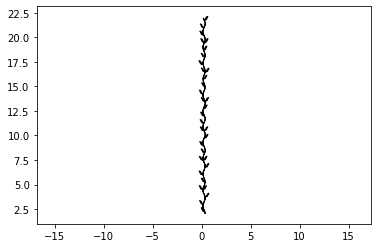

In [4]:
help(vine)
polygon = vine(22,2,0.25,0.5,3.89,0.25,0.35,[1,1,2,3],3, .025)
plt.fill(*zip(*polygon), color = 'black')
plt.axis('equal')